In [7]:
import pandas as pd
import re
import os
import matplotlib.pyplot as plt


In [62]:
# make a more complete spreadsheet

df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0421/Report_part1_nodup.csv')
pid_mclid = {}
for i, item in df.iterrows():
    if item['MCL_ID'] == item['MCL_ID'] and item['Patient ID'] == item['Patient ID']:
        pid = str(item['Patient ID']).replace('.0', '')
        mclid = str(item['MCL_ID']).replace('.0', '')
        pid_mclid[pid] = mclid
df = pd.read_excel('/nfs/masi/MCL/file/clinical/LabelFile/0601MK/IPN_biomarker-MK_nopassword.xlsx')
more_MCLID = []
for i, item in df.iterrows():
    pid = str(item['Patient.ID']).replace('.0', '')
    if pid in pid_mclid.keys():
        more_MCLID.append(pid_mclid[pid])
    else:
        more_MCLID.append('')
df['more_MCLID'] = more_MCLID
df.to_excel('/nfs/masi/MCL/file/clinical/LabelFile/0601MK/IPN_biomarker-MK_nopassword.xlsx')

In [67]:
df = pd.read_excel('/nfs/masi/MCL/file/clinical/LabelFile/0601MK/IPN_biomarker-MK_nopassword.xlsx')
new_MCLID = []
for i, item in df.iterrows():
    oriID = str(item['MCL.ID']).replace('.0', '')
    moreID = str(item['more_MCLID']).replace('.0', '')
    if len(moreID) > 8 and len(oriID) > 8:
        if moreID == oriID:
            new_MCLID.append(oriID)
        else:
            new_MCLID.append(item['Patient.ID'])
    elif len(moreID) > 8:
        new_MCLID.append(moreID)
    elif len(oriID) > 8:
        new_MCLID.append(oriID)
    else:
        new_MCLID.append(item['Patient.ID'])
df['MCL_ID'] = new_MCLID
df.to_excel('/nfs/masi/MCL/file/clinical/LabelFile/0601MK/IPN_biomarker-MK_nopassword.xlsx', index = False)
        

In [70]:
# add has.both colum
df = pd.read_excel('/nfs/masi/MCL/file/clinical/LabelFile/0601MK/IPN20200605_nopassword.xlsx')
hasboth_list = df['Patient.ID'].tolist()
hasboth_list = [str(i).replace('.0', '') for i in hasboth_list]
df = pd.read_excel('/nfs/masi/MCL/file/clinical/LabelFile/0601MK/IPN_biomarker-MK_nopassword.xlsx')

hasboth = []
for i, item in df.iterrows():
    pid = str(item['Patient.ID']).replace('.0', '')
    if pid in hasboth_list:
        hasboth.append(1)
    else:
        hasboth.append(0)
print (sum(hasboth))
df['hasboth'] = hasboth
df.to_excel('/nfs/masi/MCL/file/clinical/LabelFile/0601MK/IPN_biomarker-MK_nopassword.xlsx', index = False)

371


In [26]:
prep_list = os.listdir('/nfs/masi/MCL/DSB_File/prep')
prep_list = [re.split('t', i)[0] for i in prep_list]

In [68]:
# add withimg column

df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0601MK/Riqiang_6_1_2020_11_31_35.csv')

subj_list = df['Subject'].tolist()
subj_list = [re.split('[-_.]', str(i))[0] for i in subj_list]
df = pd.read_excel('/nfs/masi/MCL/file/clinical/LabelFile/0601MK/IPN_biomarker-MK_nopassword.xlsx')

withimg0601 = []

for i, item in df.iterrows():
    mclid = str(item['MCL_ID']).replace('.0', '')
    if mclid in subj_list:
        withimg0601.append(1)
    else:
        withimg0601.append(0)
df['withimg0601'] = withimg0601
df.to_excel('/nfs/masi/MCL/file/clinical/LabelFile/0601MK/IPN_biomarker-MK_nopassword.xlsx')

In [13]:
# see how many long subject in 
df = pd.read_csv('/nfs/masi/gaor2/data/Cotrain/clinical_spore/mcl/IPN_biomarker-MK_nopassword.csv')
data_path = '/nfs/masi/MCL/nifti/combine'
data_list = os.listdir(data_path)
#subj_sess = {}
subjCnt, longCnt = [], []
for i, item in df.iterrows():
    mclid = str(item['MCL_ID']).replace('.0', '')
    if mclid in data_list:
        subjCnt.append(mclid)
        if len(os.listdir(data_path + '/' + mclid)) > 1:
            longCnt.append(mclid)
islong0601 = []
for i, item in df.iterrows():
    mclid = str(item['MCL_ID']).replace('.0', '')
    if mclid in longCnt:
        islong0601.append(1)
    else:
        islong0601.append(0)
df['islong0601'] = islong0601
df.to_csv('/nfs/masi/gaor2/data/Cotrain/clinical_spore/mcl/IPN_biomarker-MK_nopassword.csv', index = False)


44


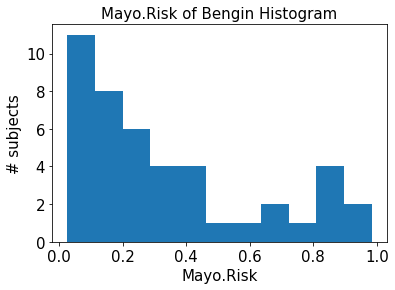

In [54]:
df = pd.read_csv('/nfs/masi/gaor2/data/Cotrain/clinical_spore/mcl/IPN_biomarker-MK_nopassword.csv')
df = df.query('islong0601 == 1')
factor = 'Mayo.Risk'
df = df.loc[df[factor] == df[factor]]
df = df.loc[df['1Cancer0Benign'] == 0]
item_list = df[factor].tolist()
#item_list = [i for i in item_list if i == i and i != '']
#print (df.keys())
plt.hist(item_list,  bins=11)  # `density=False` would make counts

plt.title('Mayo.Risk of Bengin Histogram', fontsize =15)
plt.ylabel('# subjects', fontsize =15)
plt.xlabel('Mayo.Risk', fontsize =15)
#plt.xlim(0, 55)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
print (len(item_list))

In [45]:
df = pd.read_excel('/nfs/masi/MCL/file/clinical/LabelFile/0601MK/IPN_biomarker-MK_nopassword.xlsx')
print (df.keys())
df = df.query('withimg0601 == 1')
factors = ['1Cancer0Benign', 'Mayo.Risk', 'Race', 'Gender',
       'Gender.0.Female.1.Male',  'BMI', 'PKY','CSI..CYFRA21.1..ng.mL.' ]
for fact in factors: 
    print (fact)
    MCL_factor = {}
    for i, item in df.iterrows():
        MCL_ID = str(item['MCL.ID']).replace('.0', '')
        if MCL_ID not in MCL_factor.keys():
            MCL_factor[MCL_ID] = item[fact] 
        elif MCL_factor[MCL_ID] != MCL_factor[MCL_ID]:
            MCL_factor[MCL_ID] = item[fact]
    cnt = 0        
    for value in MCL_factor.values():
        if value != value:
            cnt += 1
    print (len(MCL_factor.values()), cnt)

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Patient.ID', 'MCL.ID', 'Sample.Barcode',
       'Cohort.1.Vandy.2.UPMC.3.DECAMP.4.UCD', 'Has.Cyfra', 'Has.HM',
       'Has.Both', 'Hard.Exclude', 'Excl.ST', 'Excl.Contrast', 'Excl.Size',
       'Excl.CT<>BD', 'Has.CYFRA.No.Exclusion', 'Has.HM.No.Exclusion',
       'Has.Both.No.Exclusion', '1Cancer0Benign', 'Flag.IPN', 'Flag.ST.2.5',
       'Flag.ST.3', 'Flag.Contrast', 'Mayo.Risk', 'Age',
       'Smoking.Status.1.CURRENT.OR.FORMER.0.NEVER',
       'Extrathoracic.Cancer.More.Then.5.Years.Prior.1.1..0.0',
       'Nodule.Size.MM', 'Spiculation.1.spiculated.0.not.spiculated.',
       'Upper.Lobe.1.yes.0.no', 'Mayo.Logit', '1.Incidental.0.Screening.',
       'Diagnosis.Date.1', 'CT<>BD', 'BD<>SBD', 'Sample Blood Draw Date',
       'Blood.Draw.Date', 'CT.Date', 'LDKA', 'Death.Date', 'Survival.Months',
       'Death.1.LtFU.0', 'Living.Status', 'Nodule.Location',
       'Nodule Slice Number', 'Contrast.Agent', 'Reconstruction.Algorithm',
       'Slice.Thic

In [51]:
df = pd.read_excel('/nfs/masi/MCL/file/clinical/LabelFile/0601MK/IPN_biomarker-MK_nopassword.xlsx')
#print (df.keys())
df = df.query('withimg0601 == 1')
print (len(df['MCL.ID'].tolist()), len(set(df['MCL.ID'].tolist())))
nodule_size = df['Nodule.Size.MM'].tolist()
print (max(nodule_size), min(nodule_size))
nodule_size = df['Mayo.Risk'].tolist()

nod6_30 = []
mayo5_65 = []
nod_mayo = []

for i, item in df.iterrows():
    if item['Mayo.Risk'] <= 0.65 and item['Mayo.Risk'] >= 0.05:
        mayo5_65.append(item['MCL.ID'])
    if item['Nodule.Size.MM'] <= 30.0 and item['Nodule.Size.MM'] >= 6.0:
        nod6_30.append(item['MCL.ID'])
print (len(mayo5_65), len(nod6_30), len(set(mayo5_65) & set(nod6_30)))

545 545
146.0 4.0
324 444 315


I need figure out which columns are useful?

question mark: 'Excl.ST', 'Excl.Contrast', 'Excl.Size', 'Excl.CT<>BD', 'Flag.IPN', 'Flag.ST.2.5',
       'Flag.ST.3', 'Flag.Contrast',

Useful: 'Patient.ID', 'MCL.ID', 'Cohort.1.Vandy.2.UPMC.3.DECAMP.4.UCD', '1Cancer0Benign',  'Mayo.Risk', 'Age',
       'Smoking.Status.1.CURRENT.OR.FORMER.0.NEVER',
       'Extrathoracic.Cancer.More.Then.5.Years.Prior.1.1..0.0',
       'Nodule.Size.MM', 'Spiculation.1.spiculated.0.not.spiculated.',
       'Upper.Lobe.1.yes.0.no', 'Mayo.Logit', 'Institution', 'Race', 'Gender',
       'Gender.0.Female.1.Male', 'Height (cm)', 'Weight (kg)', 'BMI', 'BV/KG',
       'Smoking.Status', 'Age.Started.Smoking', 'Age.Quit.Smoking', 'PKY',
       'Asbestos', 'PRIOR.CANCER.HISTORY'

In [50]:
df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0601MK/IPN_biomarker-MK_nopassword.xlsx')
print (list(df.keys()))
df = df.loc[df['CSI..CYFRA21.1..ng.mL.'] == df['CSI..CYFRA21.1..ng.mL.']]
print (len(set(df['MCL_ID'].tolist())))

['Unnamed: 0', 'Patient.ID', 'MCL_ID', 'more_MCLID', 'ORI.MCL.ID', 'Sample.Barcode', 'Cohort.1.Vandy.2.UPMC.3.DECAMP.4.UCD', 'Has.Cyfra', 'Has.HM', 'Has.Both', 'Hard.Exclude', 'Excl.ST', 'Excl.Contrast', 'Excl.Size', 'Excl.CT<>BD', 'Has.CYFRA.No.Exclusion', 'Has.HM.No.Exclusion', 'Has.Both.No.Exclusion', '1Cancer0Benign', 'Flag.IPN', 'Flag.ST.2.5', 'Flag.ST.3', 'Flag.Contrast', 'Mayo.Risk', 'Age', 'Smoking.Status.1.CURRENT.OR.FORMER.0.NEVER', 'Extrathoracic.Cancer.More.Then.5.Years.Prior.1.1..0.0', 'Nodule.Size.MM', 'Spiculation.1.spiculated.0.not.spiculated.', 'Upper.Lobe.1.yes.0.no', 'Mayo.Logit', '1.Incidental.0.Screening.', 'Diagnosis.Date.1', 'CT<>BD', 'BD<>SBD', 'Sample Blood Draw Date', 'Blood.Draw.Date', 'CT.Date', 'LDKA', 'Death.Date', 'Survival.Months', 'Death.1.LtFU.0', 'Living.Status', 'Nodule.Location', 'Nodule Slice Number', 'Contrast.Agent', 'Reconstruction.Algorithm', 'Slice.Thickness', 'Contrast', 'Exclusion', 'Histologic.Type', 'Hist.Simplified', 'Benign Diagnosis', '

In [62]:
df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0720MK/Abbott2_RAD_RAW.csv')
key_list = list(df.keys())

In [65]:
impor_list = ['FLATNESS_MM','GLCM_IBSI_DIFFERENCE_ENTROPY_2DF_HU', 
              'INTENSITY_HISTOGRAM_QCOD_HU', "GLCM_IBSI_CORRELLATION_2DV_HU", 
             'GLCM_IBSI_CORRELLATION_2DV_HU']


In [66]:
for i in range(len(impor_list)):
    print (impor_list[i] in key_list)

True
True
True
True
True


In [75]:
df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0601MK/IPN_biomarker-MK_nopassword.xlsx')



In [77]:
#print (df['MCL.ID'])
df = df.loc[df['CSI..CYFRA21.1..ng.mL.'] == df['CSI..CYFRA21.1..ng.mL.']]
print (len(df))

868


In [69]:
df.keys()

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Column S', '- all -', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Column S.1', '- all -.1', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'HISTOLOGY', 'Unnamed: 36',
       'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40',
       'HISTOLOGY.1', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'HISTOLOGY.2', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52',
       'Unnamed: 53'],
      dtype='object')